# vcAtlas RSA

In [64]:
import rsatoolbox
import pandas as pd
import h5py
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt

In [2]:
dataset_v1 = Path('/s/babbage/b/nobackup/nblancha/public-datasets/bold5000')
dataset_v2 = Path('/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2')

In [3]:
sub_data = h5py.File(dataset_v2 / 'CSI1_vcAtlas_ROIs.h5')

In [4]:
sub_data.keys()

<KeysViewHDF5 ['LHFG1', 'LHFG2', 'LHFG3', 'LHFG4', 'LHhOc1', 'LHhOc2', 'LHhOc3v', 'LHhOc4v', 'RHFG1', 'RHFG2', 'RHFG3', 'RHFG4', 'RHhOc1', 'RHhOc2', 'RHhOc3v', 'RHhOc4v']>

In [29]:
# Load dataframe containing image descriptions and presentation order
sub_df = pd.read_pickle(dataset_v2 / 'CSI1_dataframe.pkl')
# Create descriptors
obs_descriptors = {'image': sub_df.image,
                   'dataset': sub_df.dataset}

In [30]:
roi_datasets = []

for roi in sub_data.keys():
    des = {'roi': roi}
    roi_datasets.append(
        rsatoolbox.data.Dataset(
            sub_data[roi][...],
            descriptors = des,
            obs_descriptors=obs_descriptors
        )
    )

In [31]:
roi_rdms = rsatoolbox.rdm.calc_rdm(roi_datasets, descriptor='dataset')

(<Figure size 720x720 with 21 Axes>,
 array([[<AxesSubplot:title={'center':'LHFG1'}>,
         <AxesSubplot:title={'center':'LHFG2'}>,
         <AxesSubplot:title={'center':'LHFG3'}>,
         <AxesSubplot:title={'center':'LHFG4'}>,
         <AxesSubplot:title={'center':'LHhOc1'}>],
        [<AxesSubplot:title={'center':'LHhOc2'}>,
         <AxesSubplot:title={'center':'LHhOc3v'}>,
         <AxesSubplot:title={'center':'LHhOc4v'}>,
         <AxesSubplot:title={'center':'RHFG1'}>,
         <AxesSubplot:title={'center':'RHFG2'}>],
        [<AxesSubplot:title={'center':'RHFG3'}>,
         <AxesSubplot:title={'center':'RHFG4'}>,
         <AxesSubplot:title={'center':'RHhOc1'}>,
         <AxesSubplot:title={'center':'RHhOc2'}>,
         <AxesSubplot:title={'center':'RHhOc3v'}>],
        [<AxesSubplot:title={'center':'RHhOc4v'}>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:title={'center':'LHFG1'}>: {

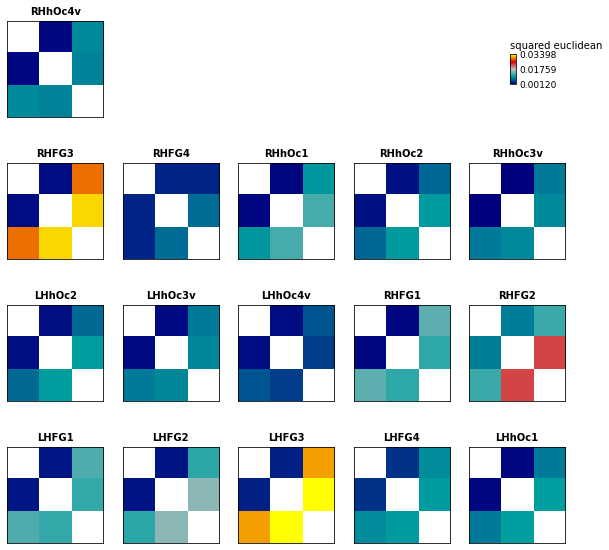

In [32]:
rsatoolbox.vis.show_rdm(
    roi_rdms, 
    figsize=(10,10), 
    rdm_descriptor='roi', 
    show_colorbar='figure'
)

In [33]:
visf_data = h5py.File(dataset_v2 / 'CSI1_visfAtlas_ROIs.h5')

In [34]:
visf_datasets = []

for roi in visf_data.keys():
    des = {'roi': roi}
    visf_datasets.append(
        rsatoolbox.data.Dataset(
            visf_data[roi][...],
            descriptors = des,
            obs_descriptors = obs_descriptors
        )
    )

In [35]:
for roi in visf_data.keys():
    num_nans = np.count_nonzero(np.isnan(visf_data[roi]))
    print(f'ROI: {roi} Num NaNs: {num_nans}')

ROI: LHCoS-places Num NaNs: 0
ROI: LHIOG-faces Num NaNs: 0
ROI: LHIOS-characters Num NaNs: 0
ROI: LHITG-bodies Num NaNs: 0
ROI: LHLOS-bodies Num NaNs: 0
ROI: LHMTG-bodies Num NaNs: 0
ROI: LHOTS-bodies Num NaNs: 0
ROI: LHhMT Num NaNs: 0
ROI: LHmFus-faces Num NaNs: 0
ROI: LHpFus-faces Num NaNs: 0
ROI: LHpOTS-characters Num NaNs: 0
ROI: LHv1d Num NaNs: 0
ROI: LHv1v Num NaNs: 0
ROI: LHv2d Num NaNs: 0
ROI: LHv2v Num NaNs: 0
ROI: LHv3d Num NaNs: 0
ROI: LHv3v Num NaNs: 0
ROI: RHCoS-places Num NaNs: 0
ROI: RHIOG-faces Num NaNs: 0
ROI: RHITG-bodies Num NaNs: 0
ROI: RHLOS-bodies Num NaNs: 0
ROI: RHMTG-bodies Num NaNs: 0
ROI: RHOTS-bodies Num NaNs: 0
ROI: RHTOS-places Num NaNs: 0
ROI: RHhMT Num NaNs: 0
ROI: RHmFus-faces Num NaNs: 0
ROI: RHpFus-faces Num NaNs: 0
ROI: RHv1d Num NaNs: 0
ROI: RHv1v Num NaNs: 0
ROI: RHv2d Num NaNs: 0
ROI: RHv2v Num NaNs: 0
ROI: RHv3d Num NaNs: 0
ROI: RHv3v Num NaNs: 0


In [36]:
roi_rdms = rsatoolbox.rdm.calc_rdm(visf_datasets, descriptor='dataset')

(<Figure size 720x720 with 37 Axes>,
 array([[<AxesSubplot:title={'center':'LHCoS-places'}>,
         <AxesSubplot:title={'center':'LHIOG-faces'}>,
         <AxesSubplot:title={'center':'LHIOS-characters'}>,
         <AxesSubplot:title={'center':'LHITG-bodies'}>,
         <AxesSubplot:title={'center':'LHLOS-bodies'}>,
         <AxesSubplot:title={'center':'LHMTG-bodies'}>],
        [<AxesSubplot:title={'center':'LHOTS-bodies'}>,
         <AxesSubplot:title={'center':'LHhMT'}>,
         <AxesSubplot:title={'center':'LHmFus-faces'}>,
         <AxesSubplot:title={'center':'LHpFus-faces'}>,
         <AxesSubplot:title={'center':'LHpOTS-characters'}>,
         <AxesSubplot:title={'center':'LHv1d'}>],
        [<AxesSubplot:title={'center':'LHv1v'}>,
         <AxesSubplot:title={'center':'LHv2d'}>,
         <AxesSubplot:title={'center':'LHv2v'}>,
         <AxesSubplot:title={'center':'LHv3d'}>,
         <AxesSubplot:title={'center':'LHv3v'}>,
         <AxesSubplot:title={'center':'RHCoS-place

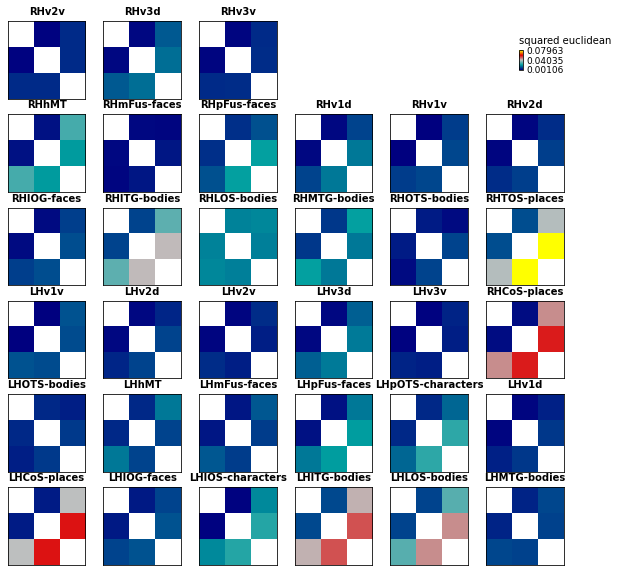

In [37]:
rsatoolbox.vis.show_rdm(
    roi_rdms, 
    figsize=(10,10), 
    rdm_descriptor='roi', 
    show_colorbar='figure'
)

In [38]:
orig_data = h5py.File(dataset_v2 / 'CSI1_ROIs.h5')
orig_datasets = []

for roi in orig_data.keys():
    des = {'roi': roi}
    orig_datasets.append(
        rsatoolbox.data.Dataset(
            orig_data[roi][...],
            descriptors = des,
            obs_descriptors = obs_descriptors
        )
    )

In [39]:
orig_rdms = rsatoolbox.rdm.calc_rdm(orig_datasets, descriptor='dataset')

(<Figure size 720x720 with 13 Axes>,
 array([[<AxesSubplot:title={'center':'LHEarlyVis'}>,
         <AxesSubplot:title={'center':'LHLOC'}>,
         <AxesSubplot:title={'center':'LHOPA'}>,
         <AxesSubplot:title={'center':'LHPPA'}>],
        [<AxesSubplot:title={'center':'LHRSC'}>,
         <AxesSubplot:title={'center':'RHEarlyVis'}>,
         <AxesSubplot:title={'center':'RHLOC'}>,
         <AxesSubplot:title={'center':'RHOPA'}>],
        [<AxesSubplot:title={'center':'RHPPA'}>,
         <AxesSubplot:title={'center':'RHRSC'}>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:title={'center':'LHEarlyVis'}>: {'image': <matplotlib.image.AxesImage at 0x7fe3cbc299a0>},
              <AxesSubplot:title={'center':'LHLOC'}>: {'image': <matplotlib.image.AxesImage at 0x7fe3cbc46130>},
              <AxesSubplot:title={'center':'LHOPA'}>: {'image': <matplotlib.image.AxesImage at 0x7fe3cbc581c0>},
              <AxesSubplot:title={'cente

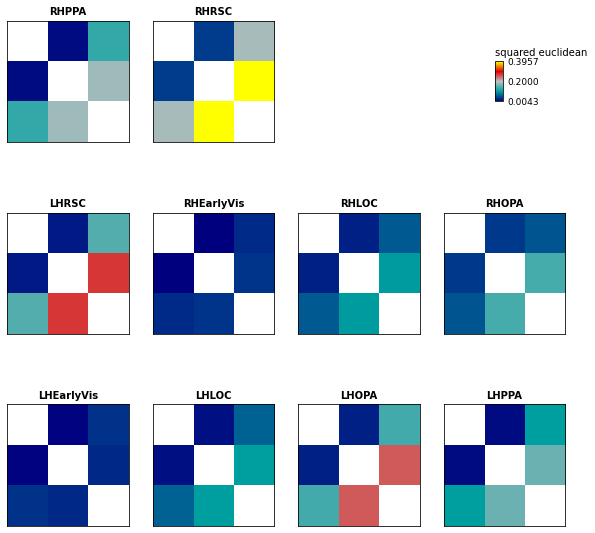

In [40]:
rsatoolbox.vis.show_rdm(
    orig_rdms, 
    figsize=(10,10), 
    rdm_descriptor='roi', 
    show_colorbar='figure'
)

In [41]:
orig_rdms

rsatoolbox.rdm.RDMs(
dissimilarity_measure = 
squared euclidean
dissimilarities = 
[[0.00651782 0.03620363 0.02919478]
 [0.01373821 0.06427551 0.10267796]
 [0.02449285 0.13580348 0.25111646]
 [0.01111806 0.10244821 0.15780384]
 [0.02042758 0.14587144 0.27029526]
 [0.00428198 0.03066504 0.03746494]
 [0.02440042 0.06085627 0.0999112 ]
 [0.04044574 0.05776315 0.13850375]
 [0.01123894 0.12817189 0.18341574]
 [0.04219625 0.18853339 0.39573738]]
descriptors = 
{}
rdm_descriptors = 
{'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'roi': ['LHEarlyVis', 'LHLOC', 'LHOPA', 'LHPPA', 'LHRSC', 'RHEarlyVis', 'RHLOC', 'RHOPA', 'RHPPA', 'RHRSC']}
pattern_descriptors = 
{'dataset': ['COCO', 'ImageNet', 'Scene'], 'index': [0, 1, 2]}

(<Figure size 720x720 with 13 Axes>,
 array([[<AxesSubplot:title={'center':'LHEarlyVis'}>,
         <AxesSubplot:title={'center':'LHLOC'}>,
         <AxesSubplot:title={'center':'LHOPA'}>,
         <AxesSubplot:title={'center':'LHPPA'}>],
        [<AxesSubplot:title={'center':'LHRSC'}>,
         <AxesSubplot:title={'center':'RHEarlyVis'}>,
         <AxesSubplot:title={'center':'RHLOC'}>,
         <AxesSubplot:title={'center':'RHOPA'}>],
        [<AxesSubplot:title={'center':'RHPPA'}>,
         <AxesSubplot:title={'center':'RHRSC'}>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:title={'center':'LHEarlyVis'}>: {'image': <matplotlib.image.AxesImage at 0x7fe3cb867310>,
               'y_labels': [Text(0, 0, 'COCO'),
                Text(0, 1, 'ImageNet'),
                Text(0, 2, 'Scene')],
               'x_labels': [Text(0, 0, 'COCO'),
                Text(1, 0, 'ImageNet'),
                Text(2, 0, 'Scene')]},
              

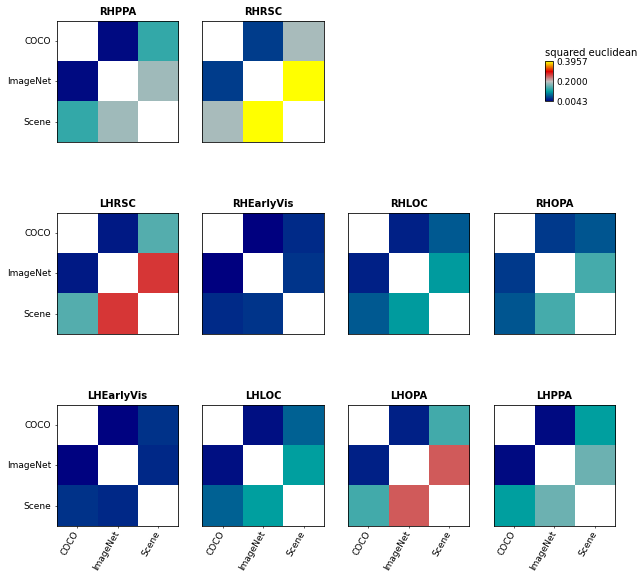

In [43]:
rsatoolbox.vis.show_rdm(
    orig_rdms, 
    figsize=(10,10), 
    rdm_descriptor='roi', 
    pattern_descriptor='dataset',
    show_colorbar='figure'
)

In [44]:
orig_datasets[0]

rsatoolbox.data.Dataset(
measurements = 
[[ 0.16727138  1.17337756 -0.4828296  ...  0.65440274  1.27738037
   0.7152169 ]
 [ 1.25898385  0.74470426  0.26411658 ...  1.51455217  0.7449799
   0.88225062]
 [ 0.27966641 -0.164892   -0.55047351 ... -0.11178005 -1.35995149
  -1.12590893]
 ...
 [-2.38013426 -0.41993786 -0.15568629 ...  0.85117432  1.00238051
   0.66673289]
 [-1.42582401 -0.01796943 -0.50758292 ...  0.69276514  1.04057688
   1.09643519]
 [-2.39909554  0.37309118  0.59220543 ...  0.6982572   0.04399473
  -0.03115802]]
descriptors = 
{'roi': 'LHEarlyVis'}
obs_descriptors = 
{'image': 0                  n01930112_19568.JPEG
1                  n03733281_29214.JPEG
2                   n07695742_5848.JPEG
3       COCO_train2014_000000420713.jpg
4       COCO_train2014_000000488558.jpg
                     ...               
5249               n03459775_11670.JPEG
5250    COCO_train2014_000000523236.jpg
5251                      dinosaur4.jpg
5252    COCO_train2014_000000244132.jpg
52

In [45]:
orig_rdms.pattern_descriptors

{'dataset': ['COCO', 'ImageNet', 'Scene'], 'index': [0, 1, 2]}

In [46]:
orig_datasets[0].to_df()

IndexError: list index out of range

## Ventral Visual Stream Analysis

In [5]:
sub_data = h5py.File(dataset_v2 / 'CSI1_vcAtlas_ROIs.h5')
sub_data.keys()

<KeysViewHDF5 ['LHFG1', 'LHFG2', 'LHFG3', 'LHFG4', 'LHhOc1', 'LHhOc2', 'LHhOc3v', 'LHhOc4v', 'RHFG1', 'RHFG2', 'RHFG3', 'RHFG4', 'RHhOc1', 'RHhOc2', 'RHhOc3v', 'RHhOc4v']>

### Combine all ROIs into one vector for the Ventral Visual Stream (VVS)

In [13]:
vvs_data = None

for roi in sub_data.keys():
    if vvs_data is None:
        vvs_data = sub_data[roi][...]
    else:
        vvs_data = np.hstack((vvs_data, sub_data[roi][...]))

In [14]:
vvs_data.shape

(5254, 12048)

In [15]:
sub_data['LHFG1'].shape

(5254, 195)

### Create dataset

In [34]:
sub_df = pd.read_pickle(dataset_v2 / 'CSI1_categories.pkl')

In [35]:
sub_df

,image,dataset,synset,category
index,,,,
0,n01930112_19568.JPEG,ImageNet,nematode.n.01,organism
1,n03733281_29214.JPEG,ImageNet,maze.n.01,artifact
2,n07695742_5848.JPEG,ImageNet,pretzel.n.01,food
3,COCO_train2014_000000420713.jpg,COCO,NaN,NaN
4,COCO_train2014_000000488558.jpg,COCO,NaN,NaN
...,...,...,...,...
5249,n03459775_11670.JPEG,ImageNet,grille.n.02,artifact
5250,COCO_train2014_000000523236.jpg,COCO,NaN,NaN
5251,dinosaur4.jpg,Scene,NaN,NaN


In [36]:
obs_descriptors = {'image': sub_df.image,
                   'dataset': sub_df.dataset,
                   'category': sub_df.category
                  }

In [37]:
vvs_dataset = rsatoolbox.data.Dataset(
    vvs_data,
    obs_descriptors=obs_descriptors
)

In [38]:
vvs_dataset

rsatoolbox.data.Dataset(
measurements = 
[[ 0.72425138  1.05559531  0.80941652 ...  0.39693374  1.74803293
  -0.15319919]
 [ 0.0644474  -1.8325511  -1.17163328 ... -1.07968641 -0.49527611
  -0.15319919]
 [ 1.1015135   0.17618783 -0.6367334  ... -0.44777973 -0.49313948
  -0.15319919]
 ...
 [ 0.24207635 -0.00266527  1.49597488 ... -1.28311275  2.11552072
  -0.10855889]
 [ 0.24118602 -0.8621167  -0.5909063  ... -0.04259198 -1.27034288
   0.0394596 ]
 [-0.35297027 -1.60584832  1.14104192 ...  0.39843614 -0.17433105
   0.28762829]]
descriptors = 
{}
obs_descriptors = 
{'image': index
0                  n01930112_19568.JPEG
1                  n03733281_29214.JPEG
2                   n07695742_5848.JPEG
3       COCO_train2014_000000420713.jpg
4       COCO_train2014_000000488558.jpg
                     ...               
5249               n03459775_11670.JPEG
5250    COCO_train2014_000000523236.jpg
5251                      dinosaur4.jpg
5252    COCO_train2014_000000244132.jpg
5253    COCO_t

In [40]:
imagenet_dataset = vvs_dataset.subset_obs('dataset', 'ImageNet')

In [42]:
category_rdms = rsatoolbox.rdm.calc_rdm(imagenet_dataset, descriptor='category')

(<Figure size 720x720 with 3 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:>: {'image': <matplotlib.image.AxesImage at 0x7fd1cc0fb8b0>,
               'y_labels': [Text(0, 0, 'artifact'),
                Text(0, 1, 'food'),
                Text(0, 2, 'organism'),
                Text(0, 3, 'place')],
               'x_labels': [Text(0, 0, 'artifact'),
                Text(1, 0, 'food'),
                Text(2, 0, 'organism'),
                Text(3, 0, 'place')]},
              <Figure size 720x720 with 3 Axes>: {'colorbar': <matplotlib.colorbar.Colorbar at 0x7fd1cc0bf4f0>}}))

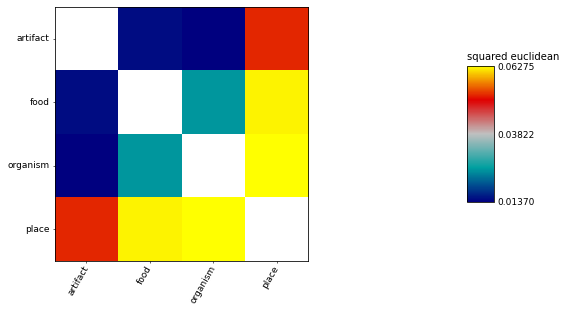

In [45]:
rsatoolbox.vis.show_rdm(
    category_rdms, 
    figsize=(10,10), 
    show_colorbar='figure',
    pattern_descriptor='category'
)

In [72]:
imagenet_dataset.sort_by('category')

In [75]:
rdms = rsatoolbox.rdm.calc_rdm_unbalanced(imagenet_dataset, descriptor='image')

In [ ]:
rdms.re

(<Figure size 720x720 with 3 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:>: {'image': <matplotlib.image.AxesImage at 0x7fd1bc85b5b0>},
              <Figure size 720x720 with 3 Axes>: {'colorbar': <matplotlib.colorbar.Colorbar at 0x7fd0a347ea60>}}))

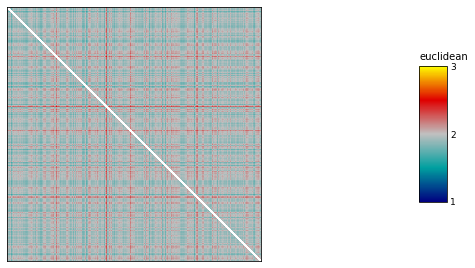

In [76]:
rsatoolbox.vis.show_rdm(
    rdms, 
    figsize=(10,10), 
    show_colorbar='figure',
    vmin=1.0,
    vmax=3.0
)

In [ ]:
rdms

In [57]:
rdms.dissimilarities.size

1834570

In [63]:
len(rdms.pattern_descriptors['image'])

1916

In [69]:
rdms.dissimilarities[0]

numpy.ndarray

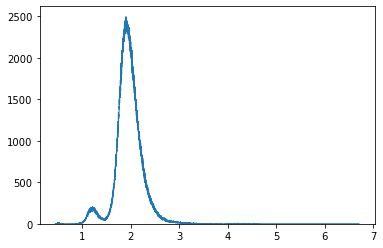

In [70]:
# Creating histogram
fig, ax = plt.subplots()
ax.hist(rdms.dissimilarities[0], bins = 10000, histtype='step')
 
# Show plot
plt.show()

## Functional Area Analysis

In [79]:
sub_df = pd.read_pickle(dataset_v2 / 'CSI1_categories.pkl')
func_data = sub_data = h5py.File(dataset_v2 / 'CSI1_visfAtlas_ROIs.h5')
func_data.keys()

<KeysViewHDF5 ['LHCoS-places', 'LHIOG-faces', 'LHIOS-characters', 'LHITG-bodies', 'LHLOS-bodies', 'LHMTG-bodies', 'LHOTS-bodies', 'LHhMT', 'LHmFus-faces', 'LHpFus-faces', 'LHpOTS-characters', 'LHv1d', 'LHv1v', 'LHv2d', 'LHv2v', 'LHv3d', 'LHv3v', 'RHCoS-places', 'RHIOG-faces', 'RHITG-bodies', 'RHLOS-bodies', 'RHMTG-bodies', 'RHOTS-bodies', 'RHTOS-places', 'RHhMT', 'RHmFus-faces', 'RHpFus-faces', 'RHv1d', 'RHv1v', 'RHv2d', 'RHv2v', 'RHv3d', 'RHv3v']>

## Combine All Functional ROIs

In [81]:
visf_data = None

for roi in func_data.keys():
    if visf_data is None:
        visf_data = sub_data[roi][...]
    else:
        visf_data = np.hstack((visf_data, func_data[roi][...]))

In [82]:
obs_descriptors = {'image': sub_df.image,
                   'dataset': sub_df.dataset,
                   'category': sub_df.category
                  }

In [83]:
visf_dataset = rsatoolbox.data.Dataset(
    visf_data,
    obs_descriptors=obs_descriptors
)

In [88]:
visf_imagenet_dataset = visf_dataset.subset_obs('dataset', 'ImageNet')

In [89]:
visf_rdms = rsatoolbox.rdm.calc_rdm(visf_imagenet_dataset, descriptor='category')

(<Figure size 720x720 with 3 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:>: {'image': <matplotlib.image.AxesImage at 0x7fd0a2e19100>,
               'y_labels': [Text(0, 0, 'artifact'),
                Text(0, 1, 'food'),
                Text(0, 2, 'organism'),
                Text(0, 3, 'place')],
               'x_labels': [Text(0, 0, 'artifact'),
                Text(1, 0, 'food'),
                Text(2, 0, 'organism'),
                Text(3, 0, 'place')]},
              <Figure size 720x720 with 3 Axes>: {'colorbar': <matplotlib.colorbar.Colorbar at 0x7fd0a2e4eb80>}}))

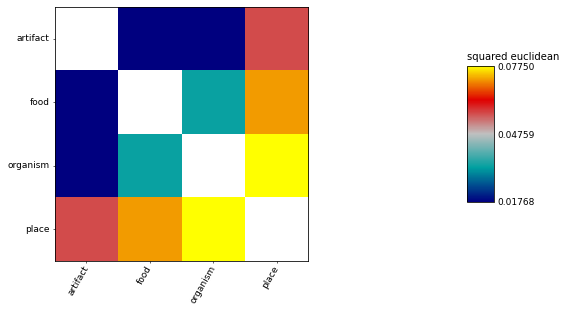

In [90]:
rsatoolbox.vis.show_rdm(
    visf_rdms, 
    figsize=(10,10), 
    show_colorbar='figure',
    pattern_descriptor='category'
)

In [93]:
visf_rdms.pattern_descriptors

{'index': [1, 2, 0, 3], 'category': ['artifact', 'food', 'organism', 'place']}

In [ ]:
visf_dataset.sub